## <center>Exercise 2 - CNN Autoencoders</center>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, GaussianNoise, Input
from tensorflow.keras.optimizers import SGD

#### Data

In [2]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()

max_val = 0
for image in X_train:
    val = image.max()
    if max_val < val:
        max_val = val 

max_val

X_train = X_train/max_val
X_test = X_test/max_val

#### Data representation

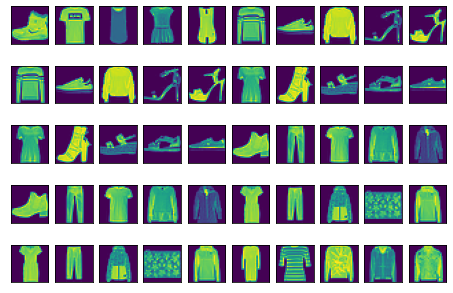

<Figure size 360x720 with 0 Axes>

In [3]:
fig, ax = plt.subplots(5, 10)
plt.figure(figsize=(5, 10))
fig.tight_layout(pad=-1)

for i in range(5):
    for j in range(10):
        ax[i,j].imshow(X_train[5*i+j])
        ax[i, j].xaxis.set_visible(False)
        ax[i, j].yaxis.set_visible(False)


In [4]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000,28,28,1)

#### Adding noise

In [5]:
sample = GaussianNoise(0.8) # value inside is a standard deviation, the bigger the value, the noisier
noisey = sample(X_train[0:5], training=True)

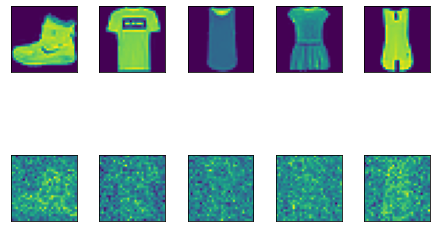

In [6]:
fig, ax = plt.subplots(2, 5)
fig.tight_layout(pad=-1)

for i in range(5):
    ax[0, i].imshow(X_train[i])
    ax[1,i].imshow(noisey[i])
    ax[0, i].xaxis.set_visible(False)
    ax[0, i].yaxis.set_visible(False)
    ax[1, i].xaxis.set_visible(False)
    ax[1, i].yaxis.set_visible(False)

#### Create  noise removal autoencoder and train it.

In [8]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = Sequential([
            Input(shape=(28, 28, 1)),
            GaussianNoise(0.8),
            Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
            Conv2D(8, (3,3), activation='relu', padding='same',strides=2)
        ])
        
        self.decoder = Sequential([
            Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        
        return decoded


In [9]:
autoencoder = Denoise()

autoencoder.compile(loss="binary_crossentropy", 
                      optimizer='adam',
                      metrics=['accuracy'])

In [10]:
autoencoder.fit(
    X_train, 
    X_train,
    epochs=10,
    shuffle=True,
    validation_data=(X_test, X_test)
)

Epoch 1/10
1875/1875 [==============================] - 90s 47ms/step - loss: 0.3544 - accuracy: 0.5021 - val_loss: 0.3006 - val_accuracy: 0.5050
Epoch 2/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.3365 - accuracy: 0.5029 - val_loss: 0.3019 - val_accuracy: 0.5055
Epoch 3/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.3343 - accuracy: 0.5031 - val_loss: 0.2993 - val_accuracy: 0.5053
Epoch 4/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.3335 - accuracy: 0.5031 - val_loss: 0.3017 - val_accuracy: 0.5056
Epoch 5/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.3328 - accuracy: 0.5032 - val_loss: 0.3030 - val_accuracy: 0.5055
Epoch 6/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.3323 - accuracy: 0.5033 - val_loss: 0.2980 - val_accuracy: 0.5052
Epoch 7/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.3320 - accuracy: 0.5033 - val_loss: 0.2

In [11]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = autoencoder(ten_noisey_images[0:10])

The Original


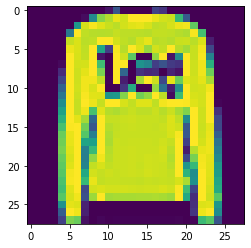

The Noisey Version


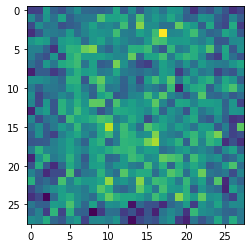

After going through denoiser


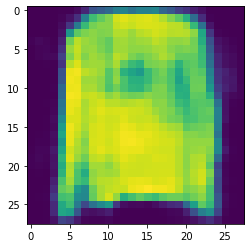

In [14]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()